In [9]:
import requests                  
from bs4 import BeautifulSoup   
 

response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('table', { 'class': 'table_develop3' })   
data = []                            
for tr in table.find_all('tr'):      
    tds = list(tr.find_all('td'))  
                                 
    for td in tds:                   
        if td.find('a'):           
            point = td.find('a').text   
            temperature = tds[5].text  
            humidity = tds[9].text      
            THI = tds[7].text
            wind = tds[11].text
            data.append([point, temperature, humidity, THI, wind]    
 
data    

[['서울', '25.6', '30', '70', '2.1'],
 ['백령도', '18.4', '62', '64', '5.2'],
 ['인천', '20.8', '54', '67', '2.9'],
 ['수원', '25.0', '41', '71', '2.4'],
 ['동두천', '24.9', '34', '70', '1.7'],
 ['파주', '25.1', '39', '71', '2.2'],
 ['강화', '20.0', '56', '66', '5.0'],
 ['양평', '25.5', '32', '70', '2.9'],
 ['이천', '25.6', '28', '70', '2.9'],
 ['북춘천', '24.6', '36', '70', '3.4'],
 ['북강릉', '19.9', '56', '65', '3.1'],
 ['울릉도', '16.8', '77', '62', '1.7'],
 ['속초', '19.1', '75', '65', '2.9'],
 ['철원', '23.9', '37', '69', '2.2'],
 ['대관령', '17.9', '49', '62', '3.3'],
 ['춘천', '25.7', '39', '71', '2.1'],
 ['강릉', '22.7', '41', '68', '2.1'],
 ['동해', '19.5', '77', '66', '3.6'],
 ['원주', '23.4', '36', '68', '1.6'],
 ['영월', '24.2', '34', '69', '3.1'],
 ['인제', '24.3', '31', '69', '2.7'],
 ['홍천', '25.4', '25', '70', '3.4'],
 ['태백', '19.6', '43', '64', '3.6'],
 ['정선군', '23.0', '32', '68', '0.6'],
 ['서산', '23.6', '49', '70', '2.0'],
 ['청주', '24.3', '33', '69', '2.7'],
 ['대전', '25.1', '37', '71', '1.8'],
 ['충주', '24.4', '32',

In [10]:
with open('weather.csv', 'w') as file:    
    file.write('point,temperature,humidity,THI,wind\n')               
    for i in data:                                            
        file.write('{0},{1},{2},{3},{4}\n'.format(i[0], i[1], i[2], i[3], i[4]))

In [1]:
import pandas as pd
df = pd.read_csv('weather.csv', encoding='euc-kr')
df 

,point,temperature,humidity,THI,wind
0,서울,25.6,30,70,2.1
1,백령도,18.4,62,64,5.2
2,인천,20.8,54,67,2.9
3,수원,25.0,41,71,2.4
4,동두천,24.9,34,70,1.7
5,파주,25.1,39,71,2.2
6,강화,20.0,56,66,5.0
7,양평,25.5,32,70,2.9
8,이천,25.6,28,70,2.9
9,북춘천,24.6,36,70,3.4


In [34]:
df1=df.groupby('THI')
print(df1)

In [35]:
for key, item in df1:
    print(key)
    print(item)

62
   point  temperature  humidity  THI  wind
11   울릉도         16.8        77   62   1.7
14   대관령         17.9        49   62   3.3
63
   point  temperature  humidity  THI  wind
71    울진         17.6        84   63   3.4
83   청송군         17.9        71   63   2.3
64
   point  temperature  humidity  THI  wind
1    백령도         18.4        62   64   5.2
22    태백         19.6        43   64   3.6
65
   point  temperature  humidity  THI  wind
10   북강릉         19.9        56   65   3.1
12    속초         19.1        75   65   2.9
62    고산         19.1        74   65   5.8
66    포항         19.0        83   65   1.9
84    영덕         19.4        57   65   4.0
66
   point  temperature  humidity  THI  wind
6     강화         20.0        56   66   5.0
17    동해         19.5        77   66   3.6
40   흑산도         19.2        93   66   1.6
68    울산         19.7        70   66   3.8
70    부산         20.2        66   66   3.5
73    통영         20.0        71   66   5.3
67
   point  temperature  humidity  THI

In [36]:
for key, item in df1:
    print(df1.get_group(key), "\n\n")

   point  temperature  humidity  THI  wind
11   울릉도         16.8        77   62   1.7
14   대관령         17.9        49   62   3.3 


   point  temperature  humidity  THI  wind
71    울진         17.6        84   63   3.4
83   청송군         17.9        71   63   2.3 


   point  temperature  humidity  THI  wind
1    백령도         18.4        62   64   5.2
22    태백         19.6        43   64   3.6 


   point  temperature  humidity  THI  wind
10   북강릉         19.9        56   65   3.1
12    속초         19.1        75   65   2.9
62    고산         19.1        74   65   5.8
66    포항         19.0        83   65   1.9
84    영덕         19.4        57   65   4.0 


   point  temperature  humidity  THI  wind
6     강화         20.0        56   66   5.0
17    동해         19.5        77   66   3.6
40   흑산도         19.2        93   66   1.6
68    울산         19.7        70   66   3.8
70    부산         20.2        66   66   3.5
73    통영         20.0        71   66   5.3 


   point  temperature  humidity  THI  w

In [37]:
df1_temp = df1['temperature'] 
print(type(df1_temp))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [38]:
for group, grouped_temp in df1_temp:
    print(group)
    print(grouped_temp)

62
11    16.8
14    17.9
Name: temperature, dtype: float64
63
71    17.6
83    17.9
Name: temperature, dtype: float64
64
1     18.4
22    19.6
Name: temperature, dtype: float64
65
10    19.9
12    19.1
62    19.1
66    19.0
84    19.4
Name: temperature, dtype: float64
66
6     20.0
17    19.5
40    19.2
68    19.7
70    20.2
73    20.0
Name: temperature, dtype: float64
67
2     20.8
33    21.4
50    22.0
61    20.7
69    20.6
80    22.0
87    21.8
Name: temperature, dtype: float64
68
16    22.7
18    23.4
23    23.0
28    23.0
31    23.7
32    23.5
35    23.7
41    21.8
44    22.5
45    22.2
47    22.8
52    22.4
60    21.9
63    23.1
74    23.8
75    21.9
77    21.4
81    23.0
89    22.7
Name: temperature, dtype: float64
69
13    23.9
19    24.2
20    24.3
25    24.3
27    24.4
30    24.2
34    23.9
37    24.0
38    22.8
39    22.8
42    23.2
43    22.7
46    22.9
49    23.8
53    23.5
54    23.7
55    24.1
58    24.4
76    22.8
79    23.3
Name: temperature, dtype: float64
70
0     25

In [39]:
mean_temp = df1_temp.mean() 
print(mean_temp)
print(type(mean_temp))

THI
62    17.350000
63    17.750000
64    19.000000
65    19.300000
66    19.766667
67    21.328571
68    22.763158
69    23.660000
70    24.666667
71    25.200000
Name: temperature, dtype: float64
<class 'pandas.core.series.Series'>


In [42]:
print(df.groupby('THI')['point'].nunique())

THI
62     2
63     2
64     2
65     5
66     6
67     7
68    19
69    20
70    21
71    11
Name: point, dtype: int64


In [45]:
print(df.groupby('THI')['wind'].describe())

     count      mean       std  min    25%   50%    75%  max
THI                                                         
62     2.0  2.500000  1.131371  1.7  2.100  2.50  2.900  3.3
63     2.0  2.850000  0.777817  2.3  2.575  2.85  3.125  3.4
64     2.0  4.400000  1.131371  3.6  4.000  4.40  4.800  5.2
65     5.0  3.540000  1.467310  1.9  2.900  3.10  4.000  5.8
66     6.0  3.800000  1.316055  1.6  3.525  3.70  4.700  5.3
67     7.0  3.300000  0.988264  1.9  2.650  3.30  3.950  4.7
68    19.0  2.673684  1.178908  0.6  1.600  2.70  3.600  5.3
69    20.0  2.755000  1.428092  0.2  1.775  2.70  3.375  5.8
70    21.0  2.457143  0.724273  1.0  2.000  2.50  2.900  3.4
71    11.0  2.263636  0.607079  1.5  2.050  2.20  2.300  3.9


In [46]:
print(df.groupby('THI')['wind'].mean())

THI
62    2.500000
63    2.850000
64    4.400000
65    3.540000
66    3.800000
67    3.300000
68    2.673684
69    2.755000
70    2.457143
71    2.263636
Name: wind, dtype: float64


In [47]:
def diff(values) :
    return values.max() - values.min()
agg_my_diff = df.groupby('THI').humidity.agg(diff)
print(agg_my_diff)

THI
62    28
63    13
64    19
65    27
66    37
67    30
68    35
69    22
70    32
71    13
Name: humidity, dtype: int64


In [48]:
import numpy as np
df2 = df.groupby('THI').temperature.agg([np.count_nonzero, np.mean, np.std, np.max, np.min]) 
print(df2)

     count_nonzero       mean       std  amax  amin
THI                                                
62             2.0  17.350000  0.777817  17.9  16.8
63             2.0  17.750000  0.212132  17.9  17.6
64             2.0  19.000000  0.848528  19.6  18.4
65             5.0  19.300000  0.367423  19.9  19.0
66             6.0  19.766667  0.372380  20.2  19.2
67             7.0  21.328571  0.623737  22.0  20.6
68            19.0  22.763158  0.701752  23.8  21.4
69            20.0  23.660000  0.608190  24.4  22.7
70            21.0  24.666667  0.769632  25.7  23.1
71            11.0  25.200000  0.389872  25.7  24.6


In [50]:
df2_dict = df.groupby('THI').agg({'temperature': 'mean', 'humidity': 'median', 'wind': 'std'}) 
print(df2_dict)

     temperature  humidity      wind
THI                                 
62     17.350000      63.0  1.131371
63     17.750000      77.5  0.777817
64     19.000000      52.5  1.131371
65     19.300000      74.0  1.467310
66     19.766667      70.5  1.316055
67     21.328571      54.0  0.988264
68     22.763158      38.0  1.178908
69     23.660000      36.0  1.428092
70     24.666667      34.0  0.724273
71     25.200000      39.0  0.607079


In [51]:
def my_zscore(x) :
    return (x-x.mean())/x.std()

In [55]:
transform_z = df.groupby('THI').transform(my_zscore)
print(transform_z.tail(n=10))

    temperature  humidity      wind
85     1.342633 -1.343317 -0.216966
86     1.282473 -1.397627 -0.104824
87     0.755813 -0.278727  0.000000
88    -1.126079  1.260651 -0.355036
89    -0.090000 -0.274913 -0.995569
90     0.563040 -0.583826 -2.011870
91     0.043311 -0.366829 -1.735731
92    -1.025978  0.637154 -1.257885
93    -2.035605  2.128640  0.335312
94    -0.216554  0.284163 -0.907314


In [65]:
import seaborn as sns 
import numpy as np

np.random.seed(42)
weather_10 = sns.load_dataset('weather', encoding='euc-kr').sample(10)
weather_10.loc[np.random.permutation(weather_10.index)[:4], 'temperature'] = np.NaN

print(weather_10)

      point  temperature  humidity  THI  wind
68       울산         19.7        70   66   3.8
22       태백          NaN        43   64   3.6
72       상주         25.0        32   70   1.7
73       통영         20.0        71   66   5.3
0        서울          NaN        30   70   2.1
26       대전         25.1        37   71   1.8
40      흑산도         19.2        93   66   1.6
42       완도         23.2        45   69   1.7
10      북강릉          NaN        56   65   3.1
45  진도(첨찰산)          NaN        48   68   3.4


In [66]:
count_THI = weather_10.groupby('THI').count() 
print(count_THI)

     point  temperature  humidity  wind
THI                                    
64       1            0         1     1
65       1            0         1     1
66       3            3         3     3
68       1            0         1     1
69       1            1         1     1
70       2            1         2     2
71       1            1         1     1


In [74]:
def fill_na_mean(x):
    avg = int(x.mean()) 
    return x.fillna(avg)

In [75]:
weather_group_mean = weather_10.temperature.transform(fill_na_mean)
weather_10['fill_temperature'] = weather_group_mean
print(weather_10)

      point  temperature  humidity  THI  wind  fill_temperature
68       울산         19.7        70   66   3.8              19.7
22       태백          NaN        43   64   3.6              22.0
72       상주         25.0        32   70   1.7              25.0
73       통영         20.0        71   66   5.3              20.0
0        서울          NaN        30   70   2.1              22.0
26       대전         25.1        37   71   1.8              25.1
40      흑산도         19.2        93   66   1.6              19.2
42       완도         23.2        45   69   1.7              23.2
10      북강릉          NaN        56   65   3.1              22.0
45  진도(첨찰산)          NaN        48   68   3.4              22.0


In [3]:
import seaborn as sns
weather=sns.load_dataset('weather', encoding='euc-kr')
weather.head()

,point,temperature,humidity,THI,wind
0,서울,25.6,30,70,2.1
1,백령도,18.4,62,64,5.2
2,인천,20.8,54,67,2.9
3,수원,25.0,41,71,2.4
4,동두천,24.9,34,70,1.7


In [79]:
print(weather.shape)
print(weather['THI'].value_counts())

(95, 5)
70    21
69    20
68    19
71    11
67     7
66     6
65     5
64     2
63     2
62     2
Name: THI, dtype: int64


In [82]:
weather_filtered = weather.groupby('THI').filter(lambda x: x['THI'].count() >= 10)

In [83]:
print(weather_filtered.shape)

(71, 5)


In [84]:
print(weather_filtered['THI'].value_counts())

70    21
69    20
68    19
71    11
Name: THI, dtype: int64


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

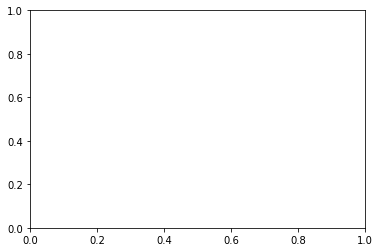

In [96]:
fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1) 

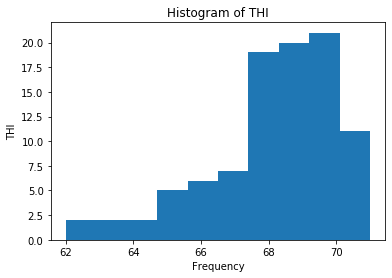

In [97]:
axes1.hist(weather['THI'], bins=10) 
axes1.set_title('Histogram of THI')
axes1.set_xlabel('Frequency') 
axes1.set_ylabel('THI') 

fig

Text(0, 0.5, 'temperature')

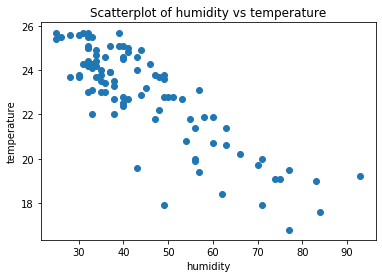

In [99]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(weather['humidity'], weather['temperature']) 
axes1.set_title('Scatterplot of humidity vs temperature') 
axes1.set_xlabel('humidity') 
axes1.set_ylabel('temperature')

In [18]:
weather.head()

,point,temperature,humidity,THI,wind
0,서울,25.6,30,70,2.1
1,백령도,18.4,62,64,5.2
2,인천,20.8,54,67,2.9
3,수원,25.0,41,71,2.4
4,동두천,24.9,34,70,1.7


In [17]:
weather

,point,temperature,humidity,THI,wind
0,서울,25.6,30,70,2.1
1,백령도,18.4,62,64,5.2
2,인천,20.8,54,67,2.9
3,수원,25.0,41,71,2.4
4,동두천,24.9,34,70,1.7
5,파주,25.1,39,71,2.2
6,강화,20.0,56,66,5.0
7,양평,25.5,32,70,2.9
8,이천,25.6,28,70,2.9
9,북춘천,24.6,36,70,3.4


Text(0.5, 1.0, 'Boxplot of temperature by area')

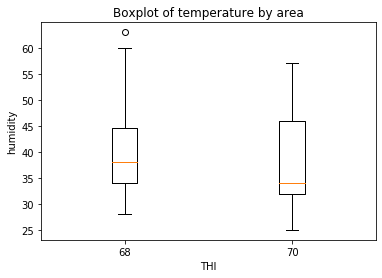

In [9]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot( 
    [weather[weather['THI']== 68]['humidity'], 
     weather[weather['THI'] == 70]['humidity']], 
    labels=['68', '70'])


axes1.set_xlabel('THI') 
axes1.set_ylabel('humidity') 
axes1.set_title('Boxplot of temperature by area')

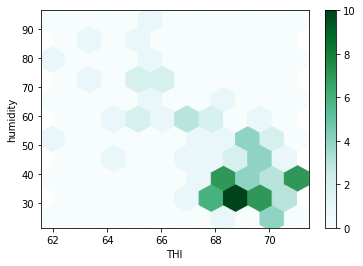

In [10]:
fig, ax = plt.subplots() 
ax = weather.plot.hexbin(x='THI', y='humidity', gridsize=10, ax=ax)

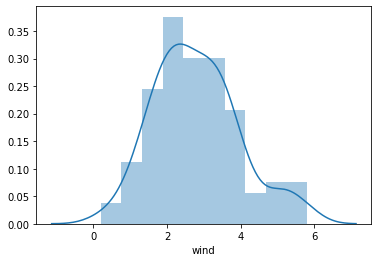

In [11]:
ax=plt.subplots()
ax=sns.distplot(weather['wind'])

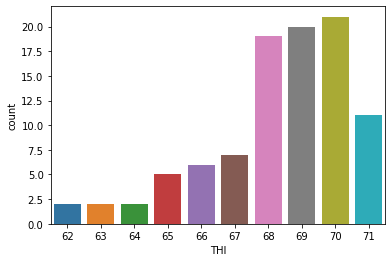

In [12]:
ax=plt.subplots()
ax=sns.countplot('THI',data=weather)